In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [3]:
no3 = sympy.Symbol('no3', real=True, positive=True, nonzero=True)
h_plus = sympy.Symbol('h_plus', real=True, positive=True, nonzero=True)
hno3 = sympy.Symbol('hno3', real=True, positive=True, nonzero=True)
h2no3 = sympy.Symbol('h2no3', real=True, positive=True, nonzero=True)
ph = sympy.Symbol('ph', real=True, positive=True)
pka = 4
pka2 = 2
# ph = 3
conc1 = 1e-3

In [4]:
n = 100
results = np.zeros((n, 3))
ph_values = np.linspace(2, 7, n)
for i, ph_in in enumerate(ph_values):
    result = sympy.solve([sympy.log(no3/hno3, 10) + sympy.log(h_plus, 10) + pka, 10**(-ph_in) - hno3 - h_plus, conc1-hno3-no3], [hno3, no3, h_plus], force=True)
    results[i, :] = result[0]
    print(f'\r{i}', end='')
print('\rdone')

done


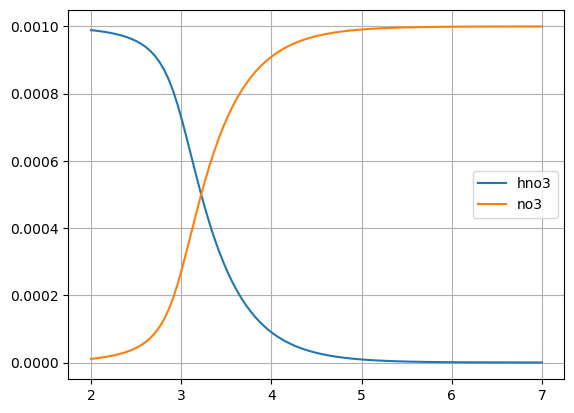

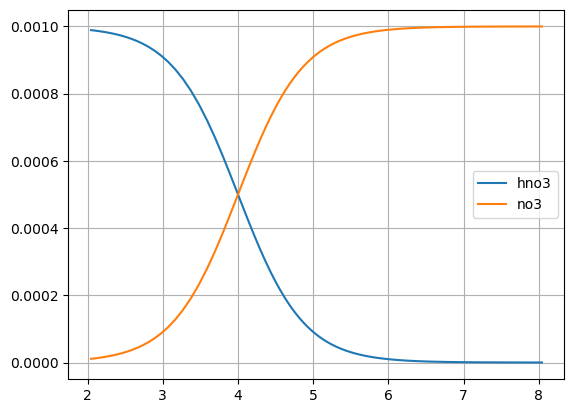

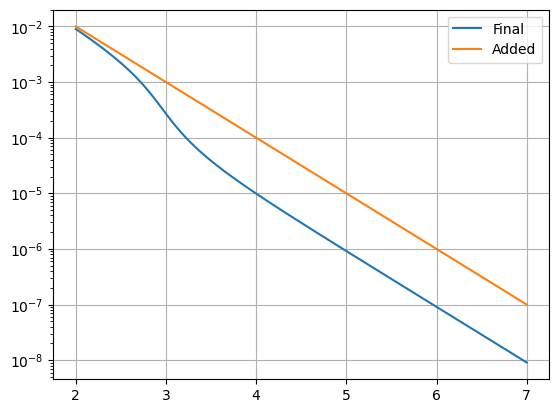

In [5]:
plt.figure()
plt.plot(ph_values, results[:, 0], label='hno3')
plt.plot(ph_values, results[:, 1], label='no3')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(-np.log10(results[:, 2]), results[:, 0], label='hno3')
plt.plot(-np.log10(results[:, 2]), results[:, 1], label='no3')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(ph_values, results[:, 2], label='Final')
plt.plot(ph_values, 10**(-ph_values), label='Added')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()


done


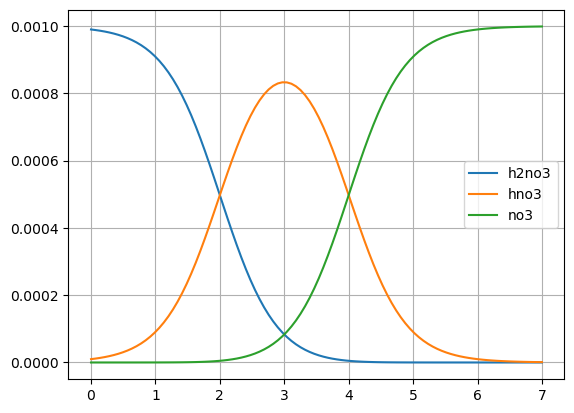

In [6]:
values = sympy.solve([sympy.log(no3/hno3, 10) + sympy.log(h_plus, 10) + pka, sympy.log(hno3/h2no3, 10) + sympy.log(h_plus, 10) + pka2, conc1-hno3-no3-h2no3], [h2no3, hno3, no3])
n = 100
results = np.zeros((n, 3))
ph_values = np.linspace(0, 7, n)
for i, ph_in in enumerate(ph_values):
    results[i, :] = [values[h2no3].subs(h_plus, 10**(-ph_in)), values[hno3].subs(h_plus, 10**(-ph_in)), values[no3].subs(h_plus, 10**(-ph_in))]
    print(f'\r{i}', end='')
print('\rdone')

plt.figure()
plt.plot(ph_values, results[:, 0], label='h2no3')
plt.plot(ph_values, results[:, 1], label='hno3')
plt.plot(ph_values, results[:, 2], label='no3')
plt.legend()
plt.grid()
plt.show()

In [7]:
ph = 5
print(sympy.nsolve([h_plus*no3/hno3 - 10**-pka, h_plus*hno3/h2no3 - 10**-pka2, 10**(-ph)-h_plus-hno3-2*h2no3, conc1-hno3-no3-h2no3], [h2no3, hno3, no3, h_plus], [1e-7, 1e-7, 1e-4, 1e-6]))


ValueError: Could not find root within given tolerance. (2.83529153137767163597e-7 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.

In [ ]:
n = 100
results = np.zeros((n, 4))
ph_values = np.linspace(2, 7, n)
for i, ph in enumerate(ph_values):
    result = sympy.solve([sympy.log(no3/hno3, 10) + sympy.log(h_plus, 10) + pka, sympy.log(hno3/h2no3, 10) + sympy.log(h_plus, 10) + pka2, 10**(-ph) - hno3 - h_plus - 2*h2no3, conc1-hno3-no3], [h2no3, hno3, no3, h_plus], force=True)
    results[i, :] = result[0]
    print(f'\r{i}', end='')
print('\rdone')

In [ ]:
plt.figure()
plt.plot(ph_values, results[:, 0], label='h2no3')
plt.plot(ph_values, results[:, 1], label='hno3')
plt.plot(ph_values, results[:, 2], label='no3')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(-np.log10(results[:, 3]), results[:, 0], label='h2no3')
plt.plot(-np.log10(results[:, 3]), results[:, 2], label='hno3')
plt.plot(-np.log10(results[:, 3]), results[:, 3], label='no3')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(ph_values, results[:, 4], label='Final')
plt.plot(ph_values, 10**(-ph_values), label='Added')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()